<div style="display: flex; text-align:center; background-color: rgb(102,120,153);" >
<h1 style="margin: auto; padding: 30px; ">Produisez une étude de marché avec R ou Python <br>
</h1>
</div>

Une entreprise française d'agroalimentaire spécialisée dans le poulet souhaite se développer à l'international. Sa stratégie mise sur l'exportation, préférable dans un premier temps à une production sur place. Il faudra donc cibler les pays les plus enclins à importer du poulet.

Pour identifier ce groupe de pays, on pourra étudier leurs indicateurs de démographies et régimes alimentaires grâce aux données mises à disposition par la FAO.

<div style="display: flex; text-align:center; background-color: rgb(102,120,153);" >
<h1 style="margin: auto; padding: 30px; ">Partie 1 - Exploration / Nettoyage <br>
</h1>
</div>

 <div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">1 - Importation des librairies et fichiers</h2>
</div>

In [1]:
# Librairies
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn import preprocessing
from sklearn import cluster, metrics
from sklearn import decomposition
from math import pi
import scipy.stats as st
import seaborn as sns
from datetime import datetime
import scipy.stats as stats
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
import matplotlib.patches as mpatches

# Importation des jeux de données
dispo_alim = pd.read_csv("csv/DisponibiliteAlimentaire_2017.csv")
popu = pd.read_csv("csv/Population_2000_2018.csv")

# Affichage des nombres : séparateur des milliers, et réduction du nombre de décimales
pd.options.display.float_format = '{:,.2f}'.format

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">2 - Nettoyage </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">2.1- Population </h3>
</div>

In [2]:
print('Valeurs en doublon sur les données extraites du fichier dispo_alim : ' + str(dispo_alim.duplicated().sum()))
print('Valeurs en doublon sur les données extraites du fichier popu : ' + str(popu.duplicated().sum()))
print('Valeurs manquantes sur les données extraites du fichier dispo_alim : ' + str(dispo_alim.isna().any().sum()))
print('Valeurs manquantes sur les données extraites du fichier popu : ' + str(popu.isna().any().sum()))

Valeurs en doublon sur les données extraites du fichier dispo_alim : 0
Valeurs en doublon sur les données extraites du fichier popu : 0
Valeurs manquantes sur les données extraites du fichier dispo_alim : 0
Valeurs manquantes sur les données extraites du fichier popu : 1


In [3]:
# Visualisation des valeurs manquantes presentes dans les colonnes
popu.isna().sum()

Code Domaine                 0
Domaine                      0
Code zone                    0
Zone                         0
Code Élément                 0
Élément                      0
Code Produit                 0
Produit                      0
Code année                   0
Année                        0
Unité                        0
Valeur                       0
Symbole                      0
Description du Symbole       0
Note                      4153
dtype: int64

In [4]:
# Valeurs unique dans la colonne Note du df popu
popu['Note'].unique()

array([nan,
       'UNDESA, Population Division – World Population Prospects, the 2017 Revision'],
      dtype=object)

In [5]:
#Première mise en situation des données issues des fichiers csv 'dispo_alim' et 'popu'
#Affichage des colonnes 
print(dispo_alim.columns)
print(popu.columns)

Index(['Code Domaine', 'Domaine', 'Code zone', 'Zone', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code année', 'Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole'],
      dtype='object')
Index(['Code Domaine', 'Domaine', 'Code zone', 'Zone', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code année', 'Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole', 'Note'],
      dtype='object')


In [6]:
#.drop() pour supprimer les variables inutiles à l'analyse
dispo_alim.drop(['Code zone','Code Élément','Code Domaine', 'Domaine', 'Code année', 'Symbole', 'Description du Symbole'],  axis=1, inplace=True)
popu.drop(['Code zone','Code Élément','Code Domaine', 'Domaine', 'Code année', 'Symbole', 'Description du Symbole','Note'],  axis=1, inplace=True)


In [7]:
popu.shape

(4411, 7)

In [8]:
# Valeurs unique dans la colonne Produit, Element et Unité du df popu
print(popu['Produit'].unique())
print(popu['Élément'].unique())
print(popu['Unité'].unique())

['Population-Estimations']
['Population totale']
['1000 personnes']


In [9]:
# Conversion 
popu['Valeur'] = popu['Valeur']*1000
popu.head()

,Zone,Élément,Code Produit,Produit,Année,Unité,Valeur
0,Afghanistan,Population totale,3010,Population-Estimations,2000,1000 personnes,"20,779,953.00"
1,Afghanistan,Population totale,3010,Population-Estimations,2001,1000 personnes,"21,606,988.00"
2,Afghanistan,Population totale,3010,Population-Estimations,2002,1000 personnes,"22,600,770.00"
3,Afghanistan,Population totale,3010,Population-Estimations,2003,1000 personnes,"23,680,871.00"
4,Afghanistan,Population totale,3010,Population-Estimations,2004,1000 personnes,"24,726,684.00"


In [10]:
# Suppression des colonnes inutile
popu.drop(['Unité','Élément','Code Produit','Produit'],axis=1, inplace = True)
popu.head()

,Zone,Année,Valeur
0,Afghanistan,2000,"20,779,953.00"
1,Afghanistan,2001,"21,606,988.00"
2,Afghanistan,2002,"22,600,770.00"
3,Afghanistan,2003,"23,680,871.00"
4,Afghanistan,2004,"24,726,684.00"


In [11]:
# Rename columns
popu.rename(columns={'Valeur':'nbr popu'},inplace=True)
popu.head()

,Zone,Année,nbr popu
0,Afghanistan,2000,"20,779,953.00"
1,Afghanistan,2001,"21,606,988.00"
2,Afghanistan,2002,"22,600,770.00"
3,Afghanistan,2003,"23,680,871.00"
4,Afghanistan,2004,"24,726,684.00"


In [12]:
# Isolement des données pour l'année 2017
popu17= popu.loc[popu['Année']==2017]
popu17= popu17.loc[:,['Zone','nbr popu']]
popu17.rename(columns={'nbr popu':'nbr popu 17'},inplace=True)
popu17.head()

,Zone,nbr popu 17
17,Afghanistan,"36,296,113.00"
36,Afrique du Sud,"57,009,756.00"
55,Albanie,"2,884,169.00"
74,Algérie,"41,389,189.00"
93,Allemagne,"82,658,409.00"


In [13]:
# Isolement des données pour l'année 2016
popu16= popu.loc[popu['Année']==2016]
popu16= popu16.loc[:,['Zone','nbr popu']]
popu16.rename(columns={'nbr popu':'nbr popu 16'},inplace=True)
popu16.head()

,Zone,nbr popu 16
16,Afghanistan,"35,383,032.00"
35,Afrique du Sud,"56,207,646.00"
54,Albanie,"2,886,438.00"
73,Algérie,"40,551,392.00"
92,Allemagne,"82,193,768.00"


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">2.2- Dispo alimentaire </h3>
</div>

In [14]:
dispo_alim.head()

,Zone,Élément,Code Produit,Produit,Année,Unité,Valeur
0,Afghanistan,Production,2511,Blé et produits,2017,Milliers de tonnes,"4,281.00"
1,Afghanistan,Importations - Quantité,2511,Blé et produits,2017,Milliers de tonnes,"2,302.00"
2,Afghanistan,Variation de stock,2511,Blé et produits,2017,Milliers de tonnes,-119.00
3,Afghanistan,Exportations - Quantité,2511,Blé et produits,2017,Milliers de tonnes,0.00
4,Afghanistan,Disponibilité intérieure,2511,Blé et produits,2017,Milliers de tonnes,"6,701.00"


In [15]:
# Visualisation de l'année d'etude des données
dispo_alim['Année'].unique()

array([2017], dtype=int64)

In [16]:
#Méthode .pivot_table() utile pour rendre le dataframe exploitable selon les modalités précédentes
dispo_alim = dispo_alim.pivot_table(index=['Zone', 'Produit'], 
                                            columns='Élément', values='Valeur', aggfunc=sum).reset_index()
dispo_alim.head()

Élément,Zone,Produit,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,NaN,NaN,NaN,5.00,1.47,0.19,0.64,53.00,NaN,6.00,53.00,NaN,48.00,0.00,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",NaN,NaN,NaN,1.00,1.32,0.01,0.02,50.00,0.00,33.00,48.00,2.00,17.00,0.00,NaN,NaN,NaN
2,Afghanistan,"Alcool, non Comestible",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,0.00
3,Afghanistan,Aliments pour enfants,NaN,NaN,NaN,1.00,0.10,0.01,0.04,4.00,NaN,4.00,4.00,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Ananas et produits,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,0.00,NaN,NaN,NaN


In [17]:
#Suppression des colonnes inutiles pour l'analyse, conservation de toutes les disponibilités, des produits et pays
dispo_alim.drop(['Aliments pour animaux','Disponibilité alimentaire en quantité (kg/personne/an)', 'Disponibilité de matière grasse en quantité (g/personne/jour)',
                'Disponibilité intérieure', 'Exportations - Quantité', 
                'Pertes', 'Production', 'Semences', 'Traitement', 'Variation de stock','Résidus','Autres utilisations (non alimentaire)','Alimentation pour touristes'], axis=1, inplace=True)
dispo_alim.head()

Élément,Zone,Produit,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Importations - Quantité,Nourriture
0,Afghanistan,Abats Comestible,5.00,0.64,6.00,53.00
1,Afghanistan,"Agrumes, Autres",1.00,0.02,33.00,48.00
2,Afghanistan,"Alcool, non Comestible",NaN,NaN,0.00,NaN
3,Afghanistan,Aliments pour enfants,1.00,0.04,4.00,4.00
4,Afghanistan,Ananas et produits,0.00,0.00,0.00,0.00


In [18]:
#Taille du dataframe
dispo_alim.shape

(16047, 6)

In [19]:
# Visualisation des modalité de la colonnes Produit
dispo_alim['Produit'].unique()

array(['Abats Comestible', 'Agrumes, Autres', 'Alcool, non Comestible',
       'Aliments pour enfants', 'Ananas et produits',
       'Arachides Decortiquees', 'Avoine', 'Bananes', 'Beurre, Ghee',
       'Bière', 'Blé et produits', 'Boissons Alcooliques',
       'Boissons Fermentés', 'Café et produits',
       'Citrons & Limes et produits', 'Coco (Incl Coprah)', 'Crème',
       'Céréales, Autres', 'Dattes', 'Edulcorants Autres',
       'Feve de Cacao et produits', 'Fruits, Autres', 'Girofles',
       'Graines Colza/Moutarde', 'Graines de coton',
       'Graines de tournesol', 'Graisses Animales Crue', 'Haricots',
       'Huil Plantes Oleif Autr', 'Huile Graines de Coton',
       "Huile d'Arachide", "Huile d'Olive", 'Huile de Coco',
       'Huile de Colza&Moutarde', 'Huile de Germe de Maïs',
       'Huile de Palme', 'Huile de Palmistes', 'Huile de Soja',
       'Huile de Son de Riz', 'Huile de Sésame', 'Huile de Tournesol',
       'Ignames', 'Lait - Excl Beurre', 'Légumes, Autres',
     

In [20]:
#On isole les produits de type viande
viande =['Abats Comestible','Graisses Animales Crue',"Viande d'Ovins/Caprins",'Viande de Bovins','Viande de Suides',
       'Viande de Volailles', 'Viande, Autre']

In [21]:
# Création d'une variable dispo_alim_volaille
dispo_alim_volaille = dispo_alim.loc[dispo_alim['Produit']=='Viande de Volailles']
del dispo_alim_volaille['Produit']
dispo_alim_volaille.head()

Élément,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Importations - Quantité,Nourriture
78,Afghanistan,5.00,0.54,29.00,55.00
173,Afrique du Sud,143.00,14.11,514.00,"2,035.00"
265,Albanie,85.00,6.26,38.00,47.00
357,Algérie,22.00,1.97,2.00,264.00
452,Allemagne,71.00,7.96,842.00,"1,609.00"


In [22]:
# Création d'une variable dispo_alim_viande
dispo_alim_viande = dispo_alim.loc[dispo_alim['Produit'].isin(viande)]
dispo_alim_viande.head(8)

Élément,Zone,Produit,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Importations - Quantité,Nourriture
0,Afghanistan,Abats Comestible,5.00,0.64,6.00,53.00
26,Afghanistan,Graisses Animales Crue,12.00,0.01,1.00,15.00
75,Afghanistan,Viande d'Ovins/Caprins,26.00,1.62,0.00,151.00
76,Afghanistan,Viande de Bovins,15.00,1.09,6.00,95.00
77,Afghanistan,Viande de Suides,0.00,0.00,0.00,0.00
78,Afghanistan,Viande de Volailles,5.00,0.54,29.00,55.00
79,Afghanistan,"Viande, Autre",1.00,0.14,0.00,11.00
82,Afrique du Sud,Abats Comestible,17.00,2.71,100.00,282.00


In [23]:
#Création d'un nouveau dataframe issu d'une agrégation par pays, avec somme de toutes les disponibilités 
df= dispo_alim_viande.groupby('Zone').sum().reset_index()
df = df.loc[:,['Zone','Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité de protéines en quantité (g/personne/jour)']]
df.head()

Élément,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
0,Afghanistan,64.00,4.04
1,Afrique du Sud,331.00,25.92
2,Albanie,317.00,21.07
3,Algérie,93.00,7.13
4,Allemagne,518.00,29.46


In [24]:
df.isna().sum()

Élément
Zone                                                        0
Disponibilité alimentaire (Kcal/personne/jour)              0
Disponibilité de protéines en quantité (g/personne/jour)    0
dtype: int64

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">3 - Enrichissement de nos donnés avec l'ajout de nouvelles variables
</h2>
</div>

Les données proviennent du site de la FAO

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">3.0- PIB </h3>
</div>

In [25]:
# Importation du csv PIB
pib = pd.read_csv('csv/PIB.csv')
pib.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,2,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,"2,058.40",X,Sources internationales sûres,NaN
1,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,"13,860.30",X,Sources internationales sûres,NaN
2,FS,Données de la sécurité alimentaire,3,Albanie,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,"12,771.00",X,Sources internationales sûres,NaN
3,FS,Données de la sécurité alimentaire,4,Algérie,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,"11,737.40",X,Sources internationales sûres,NaN
4,FS,Données de la sécurité alimentaire,79,Allemagne,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,"53,071.50",X,Sources internationales sûres,NaN


In [26]:
#Sélection des colonnes 'Zone' et 'Valeur', les autres ne sont pas nécessaires dans notre cas
pib = pib.loc[:,['Zone','Valeur']]
pib.rename(columns={'Valeur': 'PIB/habitant US$'}, inplace=True)
pib.head()

,Zone,PIB/habitant US$
0,Afghanistan,"2,058.40"
1,Afrique du Sud,"13,860.30"
2,Albanie,"12,771.00"
3,Algérie,"11,737.40"
4,Allemagne,"53,071.50"


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">3.1- Prix import Poulet </h3>
</div>

In [27]:
# Importation et visualisation du csv importation poulet
import_poulet = pd.read_csv('csv/importation poulet.csv')
import_poulet.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit (FAO),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,TCL,Cultures et produits animaux,2,Afghanistan,5609,Importations - Quantité,1057,Poulets,2017,2017,1000 têtes,"18,970.00",NaN,Donnée officielle
1,TCL,Cultures et produits animaux,2,Afghanistan,5610,Importations - Quantité,1057,Poulets,2017,2017,tonnes,0.00,NaN,Donnée officielle
2,TCL,Cultures et produits animaux,2,Afghanistan,5622,Importations - Valeur,1057,Poulets,2017,2017,1000 US$,"26,227.00",NaN,Donnée officielle
3,TCL,Cultures et produits animaux,202,Afrique du Sud,5609,Importations - Quantité,1057,Poulets,2017,2017,1000 têtes,397.00,NaN,Donnée officielle
4,TCL,Cultures et produits animaux,202,Afrique du Sud,5610,Importations - Quantité,1057,Poulets,2017,2017,tonnes,0.00,NaN,Donnée officielle


In [28]:
#Sélection des colonnes 'Zone', 'Unité' et 'Valeur', les autres ne sont pas nécessaires dans notre cas
prix_import_poulet = import_poulet.loc[:,['Zone','Unité','Valeur']]
prix_import_poulet.head(5)

,Zone,Unité,Valeur
0,Afghanistan,1000 têtes,"18,970.00"
1,Afghanistan,tonnes,0.00
2,Afghanistan,1000 US$,"26,227.00"
3,Afrique du Sud,1000 têtes,397.00
4,Afrique du Sud,tonnes,0.00


In [29]:
# Sélection des données ayant pour Unité 1000 US$
# Conversion des unités
prix_import_poulet = prix_import_poulet.loc[import_poulet['Unité']=='1000 US$']
prix_import_poulet = prix_import_poulet.loc[:,['Zone','Valeur']]
prix_import_poulet.rename(columns={'Valeur': 'Prix import poulet US$'}, inplace=True)
prix_import_poulet['Prix import poulet US$'] = prix_import_poulet['Prix import poulet US$']*1000
prix_import_poulet = prix_import_poulet.groupby('Zone').sum('Prix import poulet US$')
prix_import_poulet.head()


,Prix import poulet US$
Zone,
Afghanistan,"26,227,000.00"
Afrique du Sud,"7,394,000.00"
Albanie,"3,337,000.00"
Algérie,"21,196,000.00"
Allemagne,"343,031,000.00"


In [30]:
prix_import_poulet

,Prix import poulet US$
Zone,
Afghanistan,"26,227,000.00"
Afrique du Sud,"7,394,000.00"
Albanie,"3,337,000.00"
Algérie,"21,196,000.00"
Allemagne,"343,031,000.00"
...,...
Érythrée,"287,000.00"
États-Unis d'Amérique,"40,708,000.00"
Éthiopie,"91,000.00"


In [31]:
prix_import_poulet.duplicated().sum()

4

In [32]:
prix_import_poulet.loc[prix_import_poulet.duplicated()]

,Prix import poulet US$
Zone,
Libye,"1,000.00"
Sénégal,"719,000.00"
Vanuatu,"68,000.00"
Îles Féroé,"20,000.00"


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">3.2- Production Poulet </h3>
</div>

In [33]:
# Importation du df elevage poulet et visualisation
elevage_poulet = pd.read_csv('csv/Elevage.csv')
elevage_poulet.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit (FAO),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,QCL,Cultures et produits animaux,2,Afghanistan,5112,Réserves,1057,Poulets,2017,2017,1000 têtes,13573,NaN,Donnée officielle
1,QCL,Cultures et produits animaux,202,Afrique du Sud,5112,Réserves,1057,Poulets,2017,2017,1000 têtes,178634,Im,Données de la FAO basées sur une méthodologie ...
2,QCL,Cultures et produits animaux,3,Albanie,5112,Réserves,1057,Poulets,2017,2017,1000 têtes,7835,NaN,Donnée officielle
3,QCL,Cultures et produits animaux,4,Algérie,5112,Réserves,1057,Poulets,2017,2017,1000 têtes,136595,Im,Données de la FAO basées sur une méthodologie ...
4,QCL,Cultures et produits animaux,79,Allemagne,5112,Réserves,1057,Poulets,2017,2017,1000 têtes,160000,F,Estimation FAO


In [34]:
#Modalité colonne Unité
elevage_poulet['Unité'].unique()

array(['1000 têtes'], dtype=object)

In [35]:
#On prend uniquement les colonnes dont nous avons besoin
# Conversion des unité
elevage_poulet = elevage_poulet.loc[:,['Zone','Valeur']]
elevage_poulet.rename(columns={ 'Valeur': 'nbr poulet produit en tonnes'}, inplace=True)
elevage_poulet['nbr poulet produit en tonnes'] = elevage_poulet['nbr poulet produit en tonnes']*1000
elevage_poulet.head()

,Zone,nbr poulet produit en tonnes
0,Afghanistan,13573000
1,Afrique du Sud,178634000
2,Albanie,7835000
3,Algérie,136595000
4,Allemagne,160000000


In [36]:
elevage_poulet.duplicated().sum()

0

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">3.3- Importation poulet </h3>
</div>

In [37]:
# Isolement de la variable Importation du df dispo_alim
dispo_alim.loc[:,['Zone','Importations - Quantité']].head()

Élément,Zone,Importations - Quantité
0,Afghanistan,6.00
1,Afghanistan,33.00
2,Afghanistan,0.00
3,Afghanistan,4.00
4,Afghanistan,0.00


In [38]:
# Isolement des produits de type volailles
# Selection des colonnes utile
# Conversion des unité
import_volaille = dispo_alim_volaille.loc[:,['Zone','Importations - Quantité']]
import_volaille.rename(columns={'Importations - Quantité':'Poulet importé tonnes'},inplace=True)
import_volaille['Poulet importé tonnes'] = import_volaille['Poulet importé tonnes']*1000
import_volaille.head()

Élément,Zone,Poulet importé tonnes
78,Afghanistan,"29,000.00"
173,Afrique du Sud,"514,000.00"
265,Albanie,"38,000.00"
357,Algérie,"2,000.00"
452,Allemagne,"842,000.00"


In [39]:
import_volaille.duplicated().sum()

0

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">3.3- Viande total consommé </h3>
</div>

In [40]:
# Isolement des produits de type viande
# Selection des colonnes utile
# Conversion des unités
conso_viande = dispo_alim_viande.loc[:,['Produit','Zone','Nourriture']]
conso_viande = conso_viande.groupby('Zone').sum().reset_index()
conso_viande.rename(columns={'Nourriture':'Viande consommé en tonnes'},inplace=True)
conso_viande['Viande consommé en tonnes'] = conso_viande['Viande consommé en tonnes']*1000
conso_viande.head()

Élément,Zone,Viande consommé en tonnes
0,Afghanistan,"380,000.00"
1,Afrique du Sud,"3,722,000.00"
2,Albanie,"158,000.00"
3,Algérie,"815,000.00"
4,Allemagne,"7,420,000.00"


In [41]:
conso_viande.duplicated().sum()

0

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">3.4- Poulet total consommé </h3>
</div>

In [42]:
# Isolement des produits de type viande
# Selection des colonnes utile
# Conversion des unités
conso_poulet = dispo_alim_volaille
conso_poulet = conso_poulet.loc[:,['Zone','Nourriture']]
conso_poulet = conso_poulet.groupby('Zone').sum().reset_index()
conso_poulet.rename(columns={'Nourriture':'Poulet consommé en tonnes'},inplace=True)
conso_poulet['Poulet consommé en tonnes'] = conso_poulet['Poulet consommé en tonnes']*1000
conso_poulet.head()

Élément,Zone,Poulet consommé en tonnes
0,Afghanistan,"55,000.00"
1,Afrique du Sud,"2,035,000.00"
2,Albanie,"47,000.00"
3,Algérie,"264,000.00"
4,Allemagne,"1,609,000.00"


In [43]:
conso_poulet.duplicated().sum()

0

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">3.5- Proportion poulet consommé par rapport a la viande  </h3>
</div>

In [44]:
prop_conso = pd.merge(conso_poulet,conso_viande,how='inner',on='Zone')
prop_conso['%poulet consommé par rapport a la viande'] = (prop_conso['Poulet consommé en tonnes']/prop_conso['Viande consommé en tonnes'])*100
prop_conso = prop_conso.loc[:,['Zone','%poulet consommé par rapport a la viande']]
prop_conso.head()

Élément,Zone,%poulet consommé par rapport a la viande
0,Afghanistan,14.47
1,Afrique du Sud,54.67
2,Albanie,29.75
3,Algérie,32.39
4,Allemagne,21.68


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">3.6- Calcul croissance de la pop de l'année 2016 à 2017  </h3>
</div>

In [45]:
augm_popu = pd.merge(popu16,popu17,on='Zone')
pctage_augm_popu = ((augm_popu['nbr popu 17']-augm_popu['nbr popu 16'])/augm_popu['nbr popu 16'])*100
augm_popu['% augmentation popu 2016/2017']=pctage_augm_popu
augm_popu = augm_popu.loc[:,['Zone','% augmentation popu 2016/2017']]

augm_popu.head()

,Zone,% augmentation popu 2016/2017
0,Afghanistan,2.58
1,Afrique du Sud,1.43
2,Albanie,-0.08
3,Algérie,2.07
4,Allemagne,0.57


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">4 - Jointure
</h2>
</div>

In [46]:
df = pd.merge(df, augm_popu,how='left',on='Zone')
df = pd.merge(df, popu17,how='left',on='Zone')
df = pd.merge(df, pib,how='left',on='Zone')
df = pd.merge(df, elevage_poulet,how='left',on='Zone')
df = pd.merge(df, import_volaille,how='left',on='Zone')
df = pd.merge(df, prix_import_poulet,how='left',on='Zone')
df = pd.merge(df, prop_conso,how='left',on='Zone')
df = pd.merge(df, conso_poulet,how='left',on='Zone')
df = pd.merge(df, conso_viande,how='left',on='Zone')
df.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),% augmentation popu 2016/2017,nbr popu 17,PIB/habitant US$,nbr poulet produit en tonnes,Poulet importé tonnes,Prix import poulet US$,%poulet consommé par rapport a la viande,Poulet consommé en tonnes,Viande consommé en tonnes
0,Afghanistan,64.00,4.04,2.58,"36,296,113.00","2,058.40","13,573,000.00","29,000.00","26,227,000.00",14.47,"55,000.00","380,000.00"
1,Afrique du Sud,331.00,25.92,1.43,"57,009,756.00","13,860.30","178,634,000.00","514,000.00","7,394,000.00",54.67,"2,035,000.00","3,722,000.00"
2,Albanie,317.00,21.07,-0.08,"2,884,169.00","12,771.00","7,835,000.00","38,000.00","3,337,000.00",29.75,"47,000.00","158,000.00"
3,Algérie,93.00,7.13,2.07,"41,389,189.00","11,737.40","136,595,000.00","2,000.00","21,196,000.00",32.39,"264,000.00","815,000.00"
4,Allemagne,518.00,29.46,0.57,"82,658,409.00","53,071.50","160,000,000.00","842,000.00","343,031,000.00",21.68,"1,609,000.00","7,420,000.00"


In [47]:
df.isna().sum()

Zone                                                        0
Disponibilité alimentaire (Kcal/personne/jour)              0
Disponibilité de protéines en quantité (g/personne/jour)    0
% augmentation popu 2016/2017                               0
nbr popu 17                                                 0
PIB/habitant US$                                            8
nbr poulet produit en tonnes                                2
Poulet importé tonnes                                       2
Prix import poulet US$                                      9
%poulet consommé par rapport a la viande                    2
Poulet consommé en tonnes                                   0
Viande consommé en tonnes                                   0
dtype: int64

In [48]:
df.fillna(0,inplace=True)
df.isna().sum()

Zone                                                        0
Disponibilité alimentaire (Kcal/personne/jour)              0
Disponibilité de protéines en quantité (g/personne/jour)    0
% augmentation popu 2016/2017                               0
nbr popu 17                                                 0
PIB/habitant US$                                            0
nbr poulet produit en tonnes                                0
Poulet importé tonnes                                       0
Prix import poulet US$                                      0
%poulet consommé par rapport a la viande                    0
Poulet consommé en tonnes                                   0
Viande consommé en tonnes                                   0
dtype: int64

In [49]:
df.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),% augmentation popu 2016/2017,nbr popu 17,PIB/habitant US$,nbr poulet produit en tonnes,Poulet importé tonnes,Prix import poulet US$,%poulet consommé par rapport a la viande,Poulet consommé en tonnes,Viande consommé en tonnes
0,Afghanistan,64.00,4.04,2.58,"36,296,113.00","2,058.40","13,573,000.00","29,000.00","26,227,000.00",14.47,"55,000.00","380,000.00"
1,Afrique du Sud,331.00,25.92,1.43,"57,009,756.00","13,860.30","178,634,000.00","514,000.00","7,394,000.00",54.67,"2,035,000.00","3,722,000.00"
2,Albanie,317.00,21.07,-0.08,"2,884,169.00","12,771.00","7,835,000.00","38,000.00","3,337,000.00",29.75,"47,000.00","158,000.00"
3,Algérie,93.00,7.13,2.07,"41,389,189.00","11,737.40","136,595,000.00","2,000.00","21,196,000.00",32.39,"264,000.00","815,000.00"
4,Allemagne,518.00,29.46,0.57,"82,658,409.00","53,071.50","160,000,000.00","842,000.00","343,031,000.00",21.68,"1,609,000.00","7,420,000.00"


<div style="display: flex; text-align:center; background-color: rgb(102,120,153);" >
<h1 style="margin: auto; padding: 30px; ">Partie 2 -  Analyse <br>
</h1>
</div>

 <div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">1 - Clustering hiérarchique de nos données (Classification ascendante hierarchique)
</h2>
</div>

In [50]:
df.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),% augmentation popu 2016/2017,nbr popu 17,PIB/habitant US$,nbr poulet produit en tonnes,Poulet importé tonnes,Prix import poulet US$,%poulet consommé par rapport a la viande,Poulet consommé en tonnes,Viande consommé en tonnes
0,Afghanistan,64.00,4.04,2.58,"36,296,113.00","2,058.40","13,573,000.00","29,000.00","26,227,000.00",14.47,"55,000.00","380,000.00"
1,Afrique du Sud,331.00,25.92,1.43,"57,009,756.00","13,860.30","178,634,000.00","514,000.00","7,394,000.00",54.67,"2,035,000.00","3,722,000.00"
2,Albanie,317.00,21.07,-0.08,"2,884,169.00","12,771.00","7,835,000.00","38,000.00","3,337,000.00",29.75,"47,000.00","158,000.00"
3,Algérie,93.00,7.13,2.07,"41,389,189.00","11,737.40","136,595,000.00","2,000.00","21,196,000.00",32.39,"264,000.00","815,000.00"
4,Allemagne,518.00,29.46,0.57,"82,658,409.00","53,071.50","160,000,000.00","842,000.00","343,031,000.00",21.68,"1,609,000.00","7,420,000.00"


In [51]:
#Transformation en array Numpy
#Indexation selon les pays par la fonction .set_index()
df.set_index('Zone', inplace=True)
X = df.values
X.shape

(172, 11)

In [52]:
#Centrage / réduction des données pour que nos données puissent prendre la même importance
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
#Clustering hiérarchique: création d'une Matrice des liens selon la Méthode de Ward
Z = linkage(X_scaled, method = 'ward', metric='euclidean')

In [53]:
# Dataframe avec les données centré reduite
scaled_df = pd.DataFrame(X_scaled, columns=df.columns, index=df.index)
scaled_df.head()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),% augmentation popu 2016/2017,nbr popu 17,PIB/habitant US$,nbr poulet produit en tonnes,Poulet importé tonnes,Prix import poulet US$,%poulet consommé par rapport a la viande,Poulet consommé en tonnes,Viande consommé en tonnes
Zone,,,,,,,,,,,
Afghanistan,-1.22,-1.31,1.16,-0.04,-0.84,-0.21,-0.32,0.14,-1.14,-0.28,-0.20
Afrique du Sud,0.24,0.66,0.14,0.09,-0.27,-0.01,2.30,-0.13,0.85,0.65,0.22
Albanie,0.17,0.23,-1.19,-0.26,-0.32,-0.21,-0.27,-0.19,-0.38,-0.28,-0.23
Algérie,-1.06,-1.03,0.71,-0.01,-0.37,-0.06,-0.47,0.07,-0.25,-0.18,-0.14
Allemagne,1.27,0.98,-0.62,0.26,1.63,-0.03,4.07,4.78,-0.78,0.45,0.69


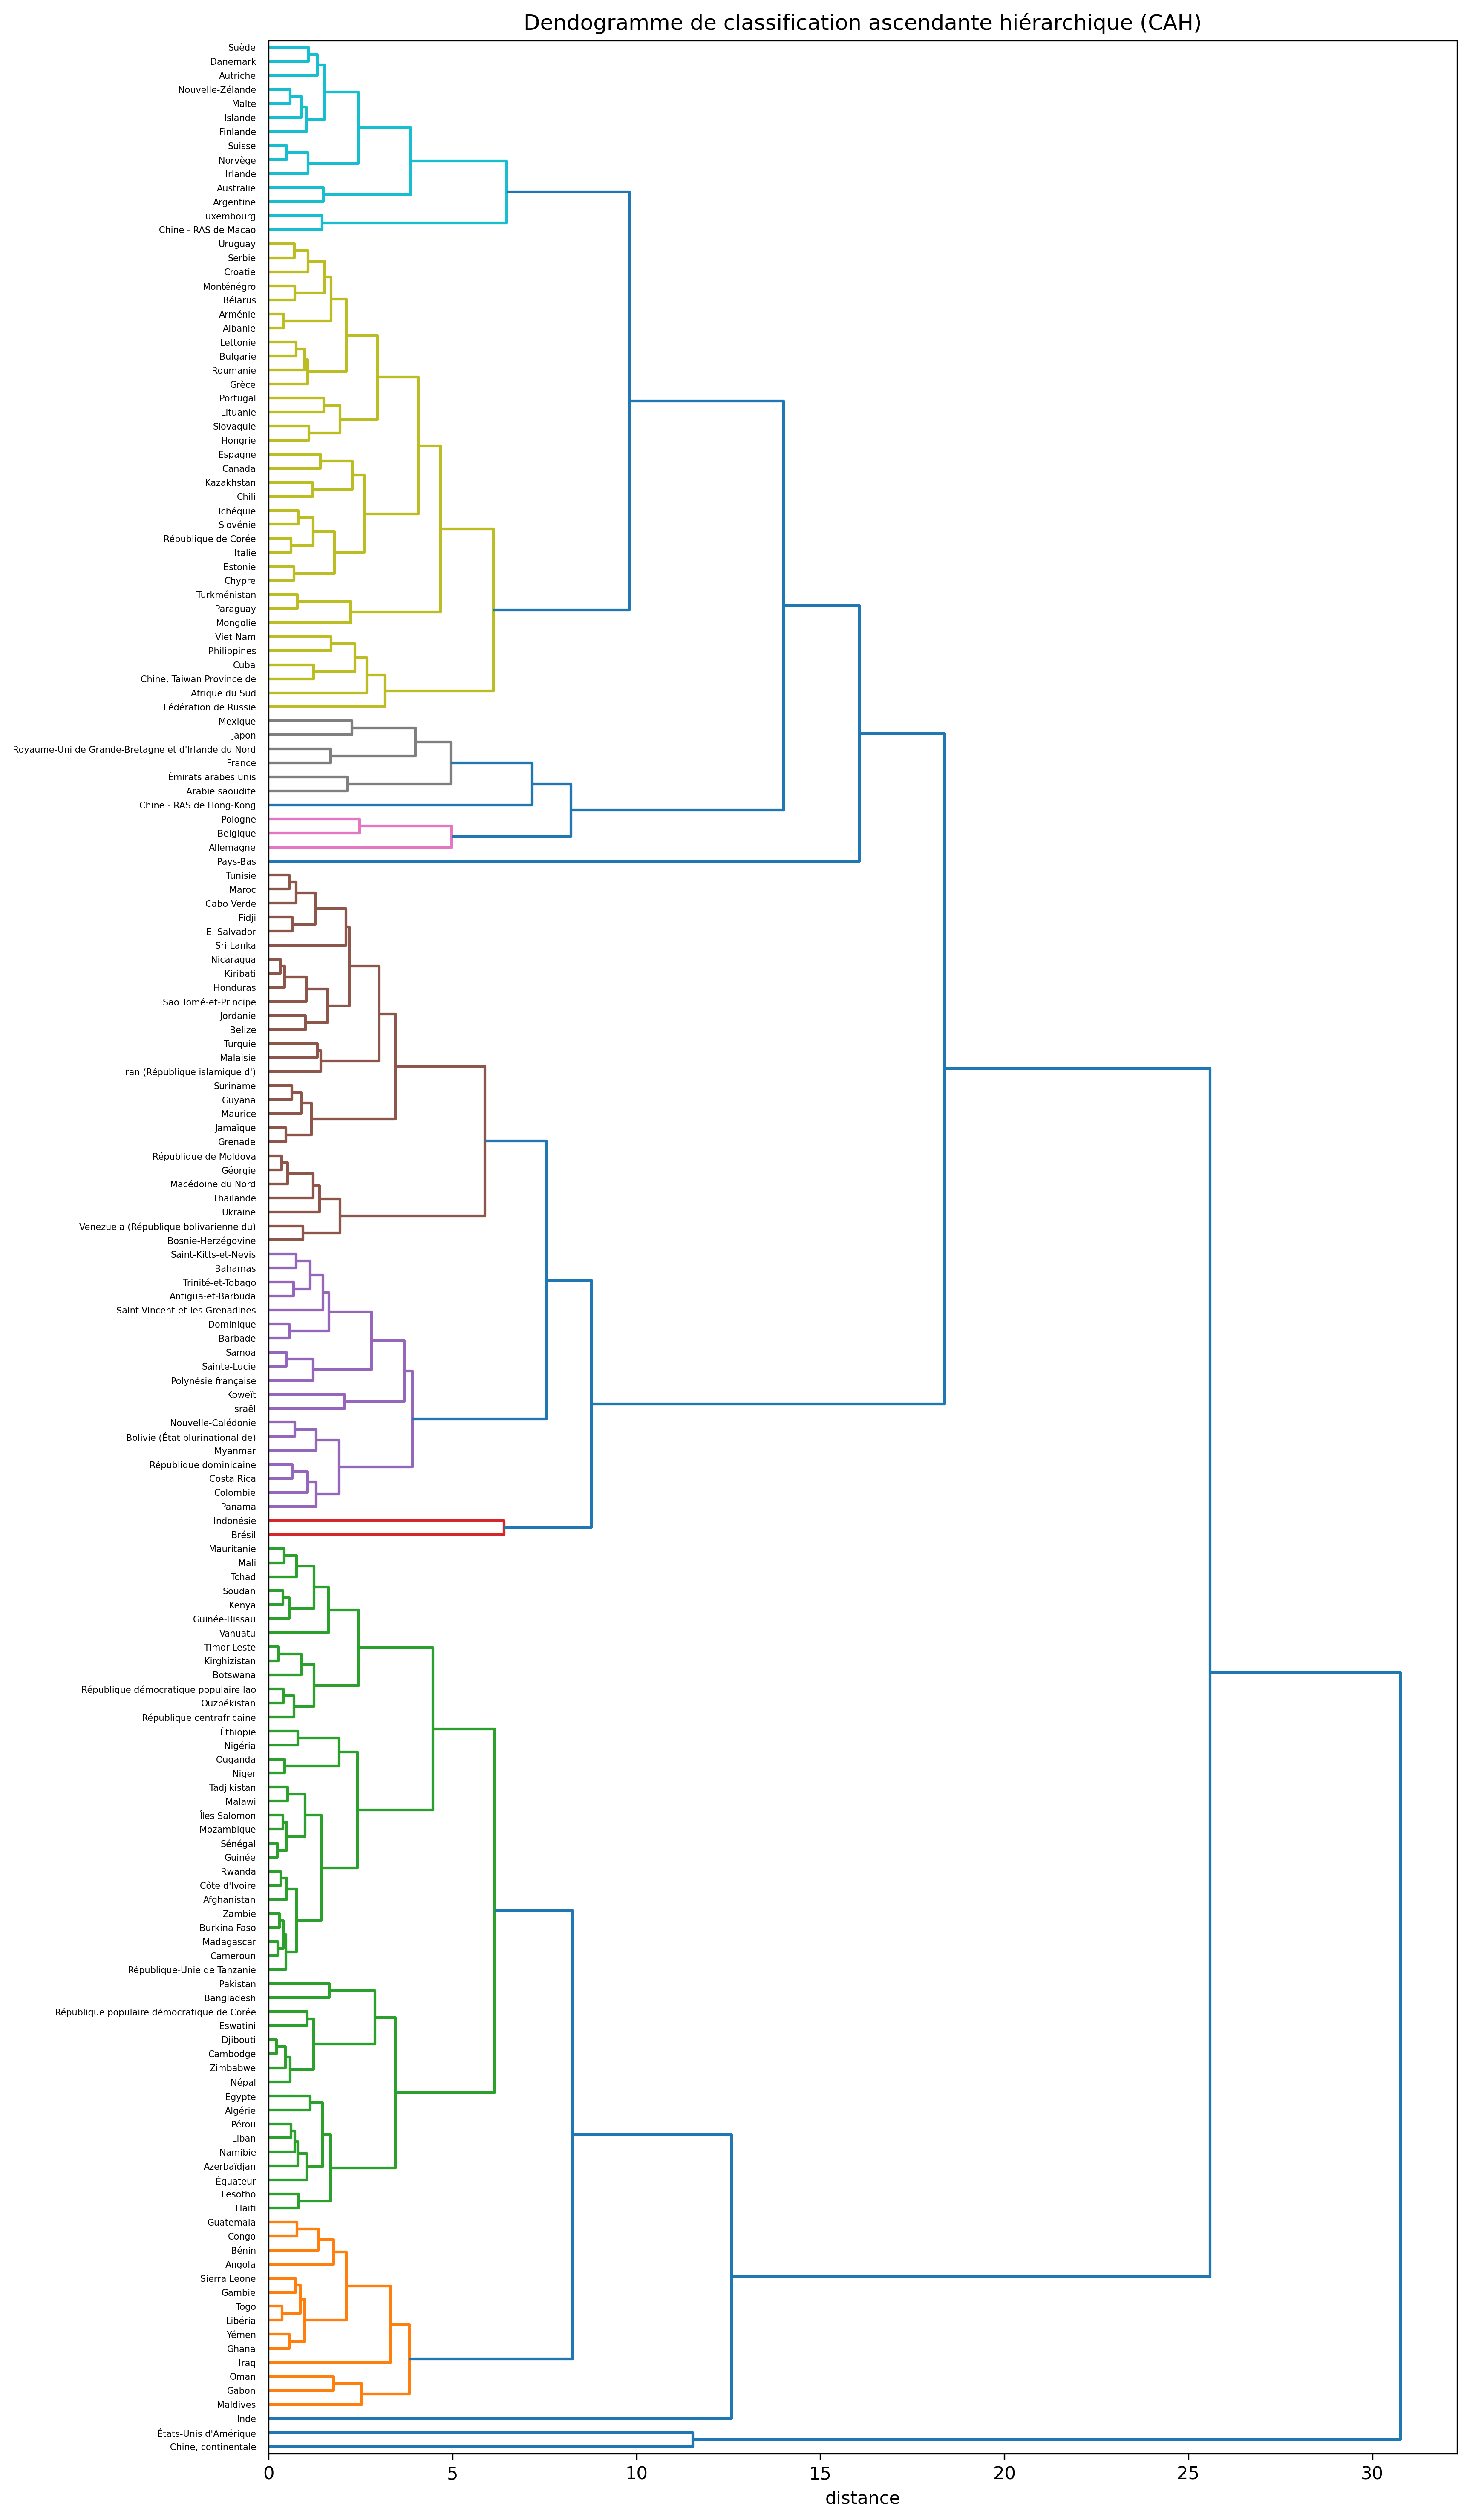

In [54]:
# Affichage du dendogramme
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(12,25), dpi=300)
plt.title('Dendogramme de classification ascendante hiérarchique (CAH)')
plt.xlabel('distance')
dendrogram(
    Z,
    labels = df.index,
    orientation = "right",
    color_threshold=7)
plt.show()

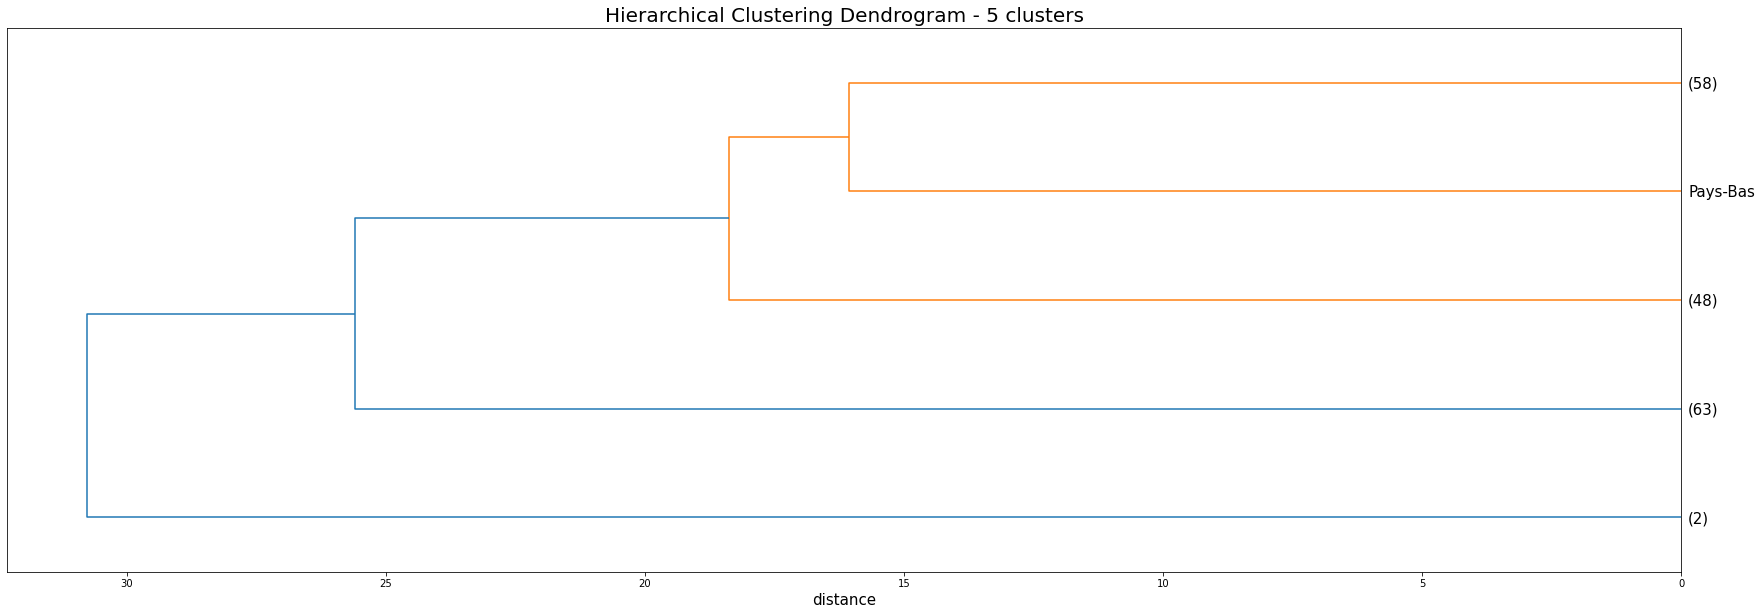

In [55]:
#Coupage du dendrogramme en 5 groupes pour avoir une première idée du partitionnement
fig = plt.figure(figsize=(30,10))
plt.title('Hierarchical Clustering Dendrogram - 5 clusters', fontsize=20)
plt.xlabel('distance', fontsize=15)

dendrogram(Z, labels = df.index, p=5, truncate_mode='lastp', leaf_font_size=15, orientation='left')
plt.show()

In [56]:
#Identification des 5 groupes obtenus
groupes_cah = fcluster(Z, 5, criterion='maxclust')
print('Numérotation de nos groupes : ' + str(np.unique(groupes_cah)))

Numérotation de nos groupes : [1 2 3 4 5]


In [57]:
#Index trié des groupes
idg = np.argsort(groupes_cah)
idg

array([169,  34,   0, 105, 103, 101,  97,  93,  92,  91,  89, 170,  84,
        82,  79,  78,  69,  66,  63,  60,  59,  58,  55, 106, 110, 111,
       112, 168, 166, 165, 164, 163, 160, 153, 152, 149, 148, 147, 142,
       139, 132, 131, 130, 126, 125, 122, 114, 113,  54,  53,  85, 171,
        37,  12,  28,  27,  25,  23,  14,   5,  43,  41,  20,   3,  48,
       120,  95, 128,  96,  15, 145, 102, 104,  18,  26, 108, 135,  13,
        19, 133,  21, 151, 115, 134, 137, 136, 143, 129,  90, 161,  49,
        56,  45,  44,  61,  62,  64,  67,  68,   6,  72,  88,  74,  76,
        17, 157,  80, 154,  81, 155,  38, 158,  36, 159,   1,   2,   9,
       167, 150,  10, 138,   4,  11, 146, 140, 162, 141, 144,   7, 156,
         8,  51, 127,  87,  86,  83,  39,  40,  77,  75,  35,  73,  70,
        42,  65,  46,  57,  47,  52,  71,  33,  32,  31, 124, 123, 121,
       119, 118, 116,  22,  16,  50, 107,  29, 100,  99,  98,  30,  94,
       109,  24, 117], dtype=int64)

In [58]:
#Affichage des pays selon leurs groupes
df_groupes_cah = pd.DataFrame(df.index[idg], groupes_cah[idg]).reset_index()
df_groupes_cah = df_groupes_cah.rename(columns={'index':'Groupe'})
df_groupes_cah.head()

,Groupe,Zone
0,1,États-Unis d'Amérique
1,1,"Chine, continentale"
2,2,Afghanistan
3,2,Niger
4,2,Namibie


In [59]:
#Intégration des groupes dans notre échantillon de départ représenté par le dataframe "df"
#Jointure interne nécessaire pour parvenir à agréger nos données
df_groupes_cah = pd.merge(scaled_df, df_groupes_cah, on='Zone',how='left')
df_groupes_cah.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),% augmentation popu 2016/2017,nbr popu 17,PIB/habitant US$,nbr poulet produit en tonnes,Poulet importé tonnes,Prix import poulet US$,%poulet consommé par rapport a la viande,Poulet consommé en tonnes,Viande consommé en tonnes,Groupe
0,Afghanistan,-1.22,-1.31,1.16,-0.04,-0.84,-0.21,-0.32,0.14,-1.14,-0.28,-0.20,2
1,Afrique du Sud,0.24,0.66,0.14,0.09,-0.27,-0.01,2.30,-0.13,0.85,0.65,0.22,4
2,Albanie,0.17,0.23,-1.19,-0.26,-0.32,-0.21,-0.27,-0.19,-0.38,-0.28,-0.23,4
3,Algérie,-1.06,-1.03,0.71,-0.01,-0.37,-0.06,-0.47,0.07,-0.25,-0.18,-0.14,2
4,Allemagne,1.27,0.98,-0.62,0.26,1.63,-0.03,4.07,4.78,-0.78,0.45,0.69,4


In [60]:
#Première comparaison des moyennes afin d'identifier le groupe de pays le plus porteur à ce niveau de l'analyse
centroïd = df_groupes_cah.groupby('Groupe').mean()
centroïd.to_csv('centroid CAH.csv')
centroïd.head()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),% augmentation popu 2016/2017,nbr popu 17,PIB/habitant US$,nbr poulet produit en tonnes,Poulet importé tonnes,Prix import poulet US$,%poulet consommé par rapport a la viande,Poulet consommé en tonnes,Viande consommé en tonnes
Groupe,,,,,,,,,,,
1,1.27,1.14,-0.62,5.44,0.51,8.20,1.07,0.19,-0.29,8.10,8.16
2,-0.93,-0.89,0.94,0.04,-0.66,-0.14,-0.29,-0.18,-0.47,-0.23,-0.18
3,-0.05,0.07,-0.38,-0.13,-0.22,-0.00,-0.37,-0.16,1.11,-0.04,-0.11
4,0.99,0.85,-0.67,-0.11,0.86,-0.13,0.53,0.13,-0.39,0.00,0.00
5,0.91,0.87,-0.92,-0.17,1.72,-0.10,2.80,11.32,-0.58,-0.14,-0.08


In [61]:
#Taille des clusters
print(str(len(df_groupes_cah[df_groupes_cah['Groupe'] == 1]['Zone'])) + " pays dans le cluster 1")
print(str(len(df_groupes_cah[df_groupes_cah['Groupe'] == 2]['Zone'])) + " pays dans le cluster 2")
print(str(len(df_groupes_cah[df_groupes_cah['Groupe'] == 3]['Zone'])) + " pays dans le cluster 3")
print(str(len(df_groupes_cah[df_groupes_cah['Groupe'] == 4]['Zone'])) + " pays dans le cluster 4")
print(str(len(df_groupes_cah[df_groupes_cah['Groupe'] == 5]['Zone'])) + " pays dans le cluster 5")

2 pays dans le cluster 1
63 pays dans le cluster 2
48 pays dans le cluster 3
58 pays dans le cluster 4
1 pays dans le cluster 5


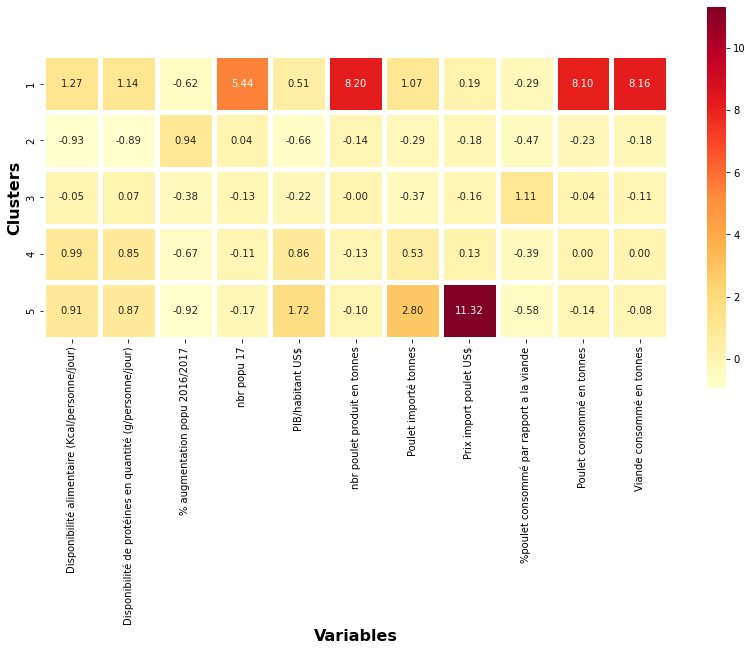

In [62]:
fig, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(centroïd, linewidth=5, annot = True, fmt='.2f', cmap="YlOrRd", cbar_kws={"shrink": 0.5}, square=True)
plt.ylabel("Clusters",weight='bold',size=16)
plt.xlabel("Variables",weight='bold',size=16)
plt.show()



Au vus de ces analyse nous optons pour l'instant sur les groupes 4,5 nous allons appuyé nos resultat avec une visualisation en boxplot

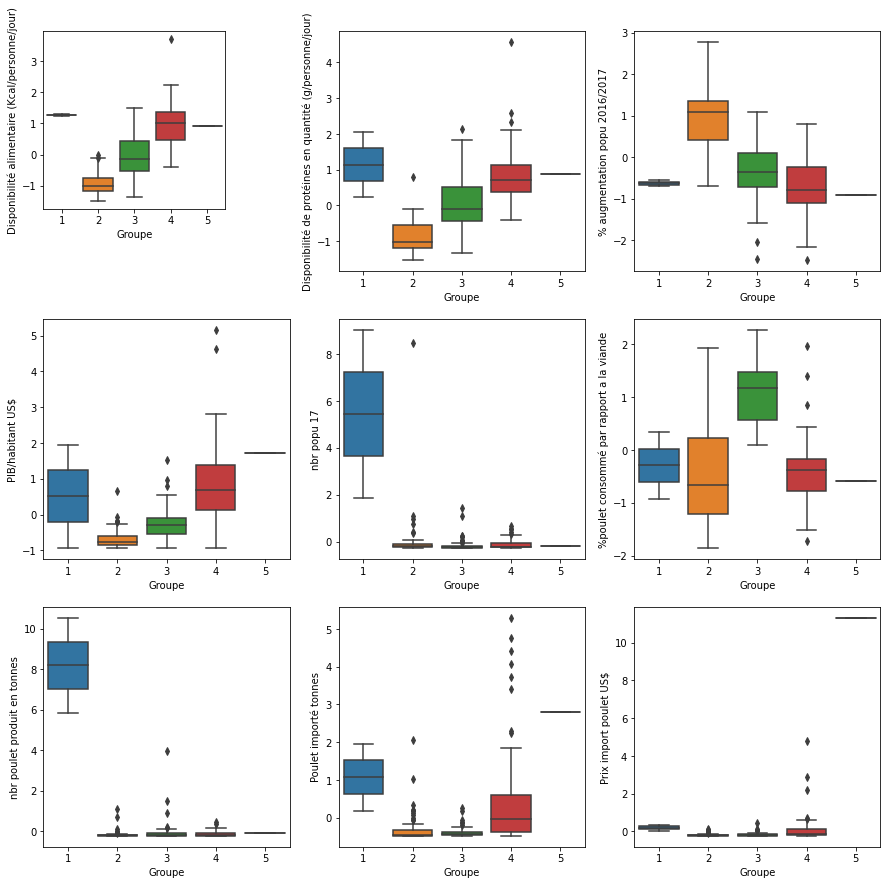

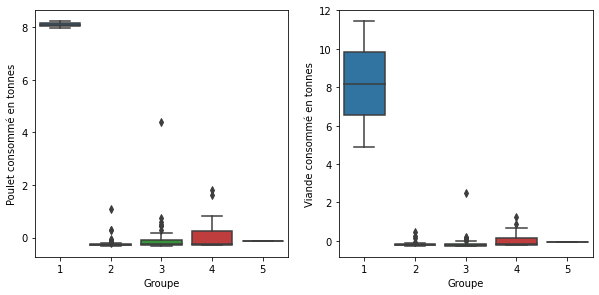

In [63]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les numéros des groupes
plt.figure(figsize=(15,15))
plt.subplot(441)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='Disponibilité alimentaire (Kcal/personne/jour)')

plt.subplot(332)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='Disponibilité de protéines en quantité (g/personne/jour)')

plt.subplot(333)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='% augmentation popu 2016/2017')

plt.subplot(334)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='PIB/habitant US$')

plt.subplot(335)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='nbr popu 17')

plt.subplot(336)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='%poulet consommé par rapport a la viande')

plt.subplot(337)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='nbr poulet produit en tonnes')

plt.subplot(338)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='Poulet importé tonnes')

plt.subplot(339)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='Prix import poulet US$')

plt.savefig("graph\\boxplot_dendogramme.png")

plt.show()

plt.figure(figsize=(10, 10))
plt.subplot(221)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='Poulet consommé en tonnes')

plt.subplot(222)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='Viande consommé en tonnes')

plt.savefig("graph\\boxplot_dendogramme2.png")

plt.show()

  - Disponibilité alimentaire plus grande chez les groupes 4,3 et 1
  - Disponibilité en protéïne plus grande chez les groupes 1,3 et 2 
  - Pourcentage d'augmentation assez equivalent ( non significatif ) 
  - PIB par habitant est plus élevé chez les groupes 4 et 1
  - Le groupe 1 sont les pays avec le plus d'habitant
  - Les groupes 3,2 et 1 consomme plus de poulet par rapport a la viande
  - Le groupe 1 produit beaucoup plus de poulet que les autres groupe de pays
  - Le groupe 1 est aussi le groupe de pays qui importe le plus de poulet suivi du groupe 4 
  - Le pays du groupe 5 bien qu'il est seul, a un fort PIB, une production de poulet faible a contrario de l'importation qui elle est forte
  
  - Deux groupe ce distingue le groupe de 4 et le 5. 

Le groupe 1 n'est pas prit en compte car il produit deja plus de poulet qu'il n'en consomme 






In [64]:
#Préparation de sous-ensembles permettant de caractériser les groupes un à un
df_groupe4_cah = df_groupes_cah.loc[df_groupes_cah['Groupe'] == 4]

In [65]:
#Préparation de sous-ensembles permettant de caractériser les groupes un à un
df_groupe5_cah = df_groupes_cah.loc[df_groupes_cah['Groupe'] == 5]

In [66]:
#Pays du groupe 4 identifiés comme potentiellement intéressants
print(df_groupe4_cah['Zone'].unique())
print(df_groupe5_cah['Zone'].unique())

['Afrique du Sud' 'Albanie' 'Allemagne' 'Arabie saoudite' 'Argentine'
 'Arménie' 'Australie' 'Autriche' 'Belgique' 'Bulgarie' 'Bélarus' 'Canada'
 'Chili' 'Chine - RAS de Hong-Kong' 'Chine - RAS de Macao'
 'Chine, Taiwan Province de' 'Chypre' 'Croatie' 'Cuba' 'Danemark'
 'Espagne' 'Estonie' 'Finlande' 'France' 'Fédération de Russie' 'Grèce'
 'Hongrie' 'Irlande' 'Islande' 'Italie' 'Japon' 'Kazakhstan' 'Lettonie'
 'Lituanie' 'Luxembourg' 'Malte' 'Mexique' 'Mongolie' 'Monténégro'
 'Norvège' 'Nouvelle-Zélande' 'Paraguay' 'Philippines' 'Pologne'
 'Portugal' 'Roumanie'
 "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"
 'République de Corée' 'Serbie' 'Slovaquie' 'Slovénie' 'Suisse' 'Suède'
 'Tchéquie' 'Turkménistan' 'Uruguay' 'Viet Nam' 'Émirats arabes unis']
['Pays-Bas']


In [67]:
df_cah_1 = df_groupes_cah.query('[4, 5] in Groupe') 
df_cah_1.shape

(59, 13)

In [68]:
df_cah_1.to_csv('Groupe de pays a laide du dendogramme.csv')
df_cah_1.sample(2)

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),% augmentation popu 2016/2017,nbr popu 17,PIB/habitant US$,nbr poulet produit en tonnes,Poulet importé tonnes,Prix import poulet US$,%poulet consommé par rapport a la viande,Poulet consommé en tonnes,Viande consommé en tonnes,Groupe
50,Finlande,1.58,0.79,-0.90,-0.24,1.36,-0.21,-0.39,-0.22,-0.69,-0.26,-0.19,4
1,Afrique du Sud,0.24,0.66,0.14,0.09,-0.27,-0.01,2.30,-0.13,0.85,0.65,0.22,4


 <div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">2 - L'algorithme du K-Means
</h2>
</div>

In [69]:
# On extrait X : 
X = df.values
# On peut le transformer en DataFrame : 
X = pd.DataFrame(X)

# Cela permet d'appliquer la méthode .head : 
X.head()

,0,1,2,3,4,5,6,7,8,9,10
0,64.00,4.04,2.58,"36,296,113.00","2,058.40","13,573,000.00","29,000.00","26,227,000.00",14.47,"55,000.00","380,000.00"
1,331.00,25.92,1.43,"57,009,756.00","13,860.30","178,634,000.00","514,000.00","7,394,000.00",54.67,"2,035,000.00","3,722,000.00"
2,317.00,21.07,-0.08,"2,884,169.00","12,771.00","7,835,000.00","38,000.00","3,337,000.00",29.75,"47,000.00","158,000.00"
3,93.00,7.13,2.07,"41,389,189.00","11,737.40","136,595,000.00","2,000.00","21,196,000.00",32.39,"264,000.00","815,000.00"
4,518.00,29.46,0.57,"82,658,409.00","53,071.50","160,000,000.00","842,000.00","343,031,000.00",21.68,"1,609,000.00","7,420,000.00"


In [70]:
from sklearn import datasets
from sklearn.cluster import KMeans

# Une liste vide pour enregistrer les inerties :  
intertia_list = [ ]

# Notre liste de nombres de clusters : 
k_list = range(1, 10)

# Pour chaque nombre de clusters : 
for k in k_list : 
    
    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k)
    
    # On entraine
    kmeans.fit(X)
    
    # On enregistre l'inertie obtenue : 
    intertia_list.append(kmeans.inertia_)

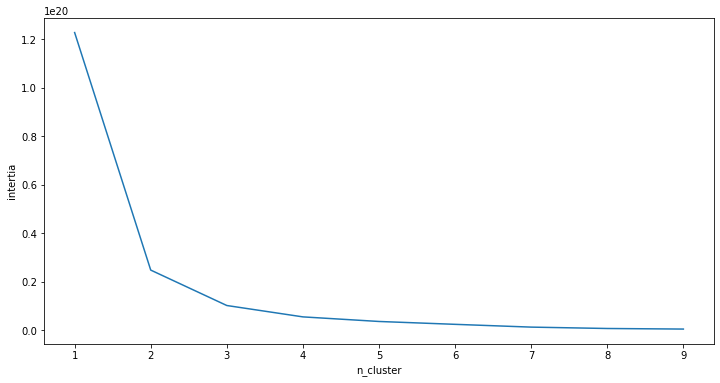

In [71]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, intertia_list)

Grâce a la methode du coude, on détermine le nombre de cluster optimal

On remarque que la cassure de la courbe a lieu a n_cluster = 3

On choisi donc de faire un clustering en 3

In [72]:
#Clustering K-Means en 3 clusters
cls3 = cluster.KMeans(n_clusters=3)
cls3.fit(X_scaled)

KMeans(n_clusters=3)

In [73]:
#Récupération des clusters attribués à chaque individu (classes d'appartenance)
clusters_kmeans3 = cls3.labels_
clusters_kmeans3

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0])

In [74]:
#Index trié des clusters
idk = np.argsort(cls3.labels_)

#Affichage des observations selon leurs clusters
df_cls3 = pd.DataFrame(df.index[idk], cls3.labels_[idk]).reset_index()
df_cls3 = df_cls3.rename(columns={'index':'cluster'})
df_cls3.head()

,cluster,Zone
0,0,Afghanistan
1,0,Ouganda
2,0,Oman
3,0,Népal
4,0,Nigéria


In [75]:
df_cls3 = pd.merge(df,df_cls3,how='inner',on='Zone')
df_cls3.to_csv('Groupe de pays a laide du kmean.csv')
df_cls3.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),% augmentation popu 2016/2017,nbr popu 17,PIB/habitant US$,nbr poulet produit en tonnes,Poulet importé tonnes,Prix import poulet US$,%poulet consommé par rapport a la viande,Poulet consommé en tonnes,Viande consommé en tonnes,cluster
0,Afghanistan,64.00,4.04,2.58,"36,296,113.00","2,058.40","13,573,000.00","29,000.00","26,227,000.00",14.47,"55,000.00","380,000.00",0
1,Afrique du Sud,331.00,25.92,1.43,"57,009,756.00","13,860.30","178,634,000.00","514,000.00","7,394,000.00",54.67,"2,035,000.00","3,722,000.00",1
2,Albanie,317.00,21.07,-0.08,"2,884,169.00","12,771.00","7,835,000.00","38,000.00","3,337,000.00",29.75,"47,000.00","158,000.00",1
3,Algérie,93.00,7.13,2.07,"41,389,189.00","11,737.40","136,595,000.00","2,000.00","21,196,000.00",32.39,"264,000.00","815,000.00",0
4,Allemagne,518.00,29.46,0.57,"82,658,409.00","53,071.50","160,000,000.00","842,000.00","343,031,000.00",21.68,"1,609,000.00","7,420,000.00",1


In [76]:
#Taille des clusters
print(str(len(df_cls3[df_cls3['cluster'] == 0]['Zone'])) + " pays dans le cluster 0")
print(str(len(df_cls3[df_cls3['cluster'] == 1]['Zone'])) + " pays dans le cluster 1")
print(str(len(df_cls3[df_cls3['cluster'] == 2]['Zone'])) + " pays dans le cluster 2")

88 pays dans le cluster 0
82 pays dans le cluster 1
2 pays dans le cluster 2


In [77]:
#Tableau d'aide à la comparaison des clusters par les centroïdes
centroids = cls3.cluster_centers_
df_centroides = pd.DataFrame(centroids, columns=df.columns)
df_centroides.to_csv('graph/centroides_clusters.csv')
df_centroides 

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),% augmentation popu 2016/2017,nbr popu 17,PIB/habitant US$,nbr poulet produit en tonnes,Poulet importé tonnes,Prix import poulet US$,%poulet consommé par rapport a la viande,Poulet consommé en tonnes,Viande consommé en tonnes
0,-0.80,-0.77,0.64,0.00,-0.58,-0.08,-0.30,-0.17,-0.07,-0.18,-0.16
1,0.82,0.80,-0.67,-0.14,0.61,-0.11,0.30,0.18,0.08,-0.00,-0.02
2,1.27,1.14,-0.62,5.44,0.51,8.20,1.07,0.19,-0.29,8.10,8.16


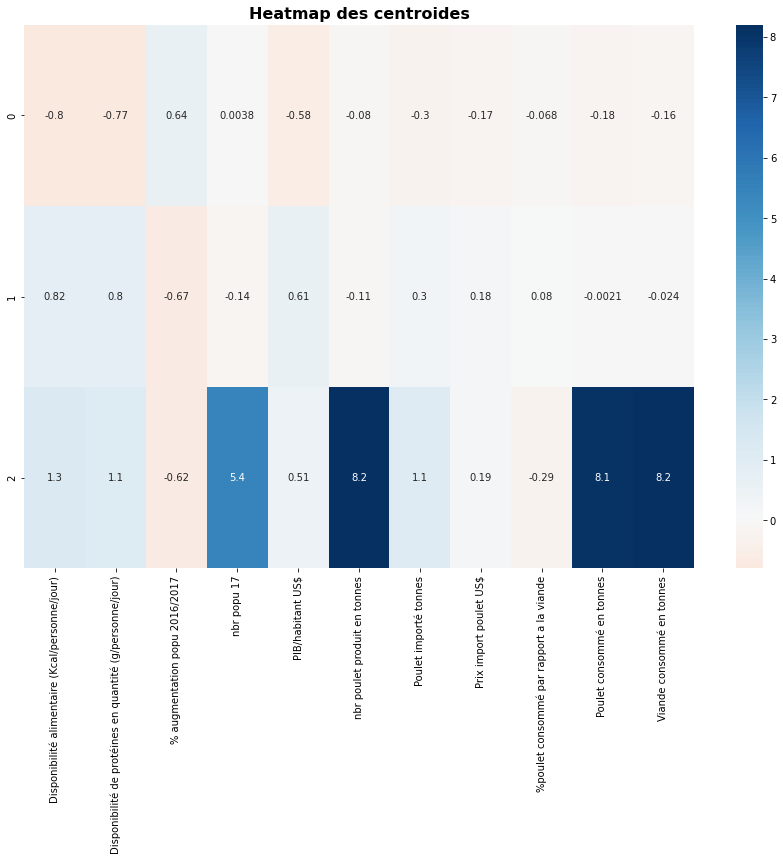

In [78]:
# Heatmap des centroides
fig = plt.figure(figsize=(15,10))
sns.heatmap(df_centroides, center=0, cmap='RdBu', annot=True)
plt.title('Heatmap des centroides', fontsize=16, fontweight='bold');

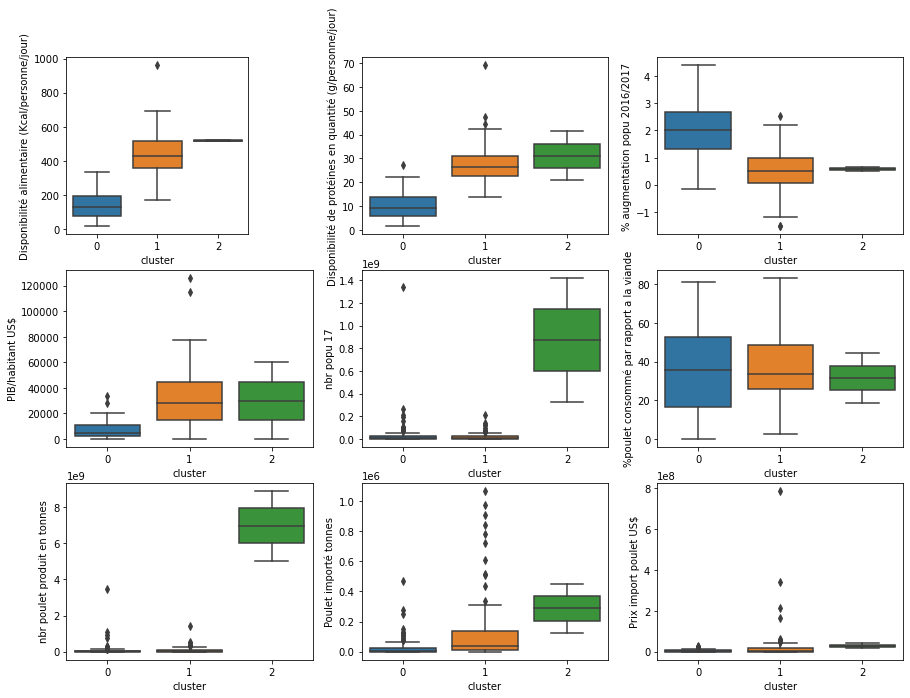

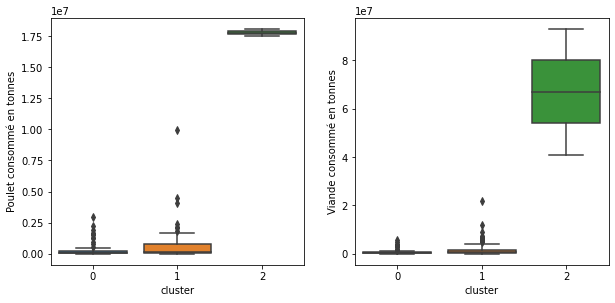

In [79]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les numéros des groupes
plt.figure(figsize=(15, 15))
plt.subplot(441)
sns.boxplot(data=df_cls3, x='cluster', y='Disponibilité alimentaire (Kcal/personne/jour)')

plt.subplot(432)
sns.boxplot(data=df_cls3, x='cluster', y='Disponibilité de protéines en quantité (g/personne/jour)')

plt.subplot(433)
sns.boxplot(data=df_cls3, x='cluster', y='% augmentation popu 2016/2017')

plt.subplot(434)
sns.boxplot(data=df_cls3, x='cluster', y='PIB/habitant US$')

plt.subplot(435)
sns.boxplot(data=df_cls3, x='cluster', y='nbr popu 17')

plt.subplot(436)
sns.boxplot(data=df_cls3, x='cluster', y='%poulet consommé par rapport a la viande')

plt.subplot(437)
sns.boxplot(data=df_cls3, x='cluster', y='nbr poulet produit en tonnes')

plt.subplot(438)
sns.boxplot(data=df_cls3, x='cluster', y='Poulet importé tonnes')

plt.subplot(439)
sns.boxplot(data=df_cls3, x='cluster', y='Prix import poulet US$')


plt.savefig("graph\\boxplot_kmean.png")

plt.show()

plt.figure(figsize=(10,10))
plt.subplot(221)
sns.boxplot(data=df_cls3, x='cluster', y='Poulet consommé en tonnes')
plt.subplot(222)
sns.boxplot(data=df_cls3, x='cluster', y='Viande consommé en tonnes')
plt.savefig("graph\\boxplot_Kmean2.png")
plt.show()


- Dispo alimentaire plus grande chez les clusters 1 et 2
- Dispo en protéine plus élevé chez les cluster 1 et 2 
- PIB par habitant plus elevé chez les cluster 1 et 2
- Plus d'habitant chez le cluster 2
- Les pays des cluster 0 et 1 ont un pourcentage de poulet consommé par rapport a la viande plus elevé que les pays du cluster 2
- Les pays du cluster 2 produisent enormément de poulet, il en importe aussi beaucoup
- Le cluster 2 importe beaucoup de poulet 

En sachant que le cluster 1 represente les pays avec un fort PIB par habitant et que sa consommation en poulet est plus élevé que celle de la viande et qu'ils ne produisent pas beaucoup de poulet il serais interessant de ciblé ce cluster de pays plutot que les deux autres.

In [92]:
cluster_1 = df_cls3[['Zone','cluster']].loc[df_cls3['cluster']==1]
cluster_1['Zone'].unique()

array(['Afrique du Sud', 'Albanie', 'Allemagne', 'Antigua-et-Barbuda',
       'Arabie saoudite', 'Argentine', 'Arménie', 'Australie', 'Autriche',
       'Bahamas', 'Barbade', 'Belgique',
       'Bolivie (État plurinational de)', 'Bosnie-Herzégovine', 'Brésil',
       'Bulgarie', 'Bélarus', 'Canada', 'Chili',
       'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao',
       'Chine, Taiwan Province de', 'Chypre', 'Croatie', 'Cuba',
       'Danemark', 'Dominique', 'Espagne', 'Estonie', 'Finlande',
       'France', 'Fédération de Russie', 'Grenade', 'Grèce', 'Hongrie',
       'Irlande', 'Islande', 'Israël', 'Italie', 'Jamaïque', 'Japon',
       'Kazakhstan', 'Koweït', 'Lettonie', 'Lituanie', 'Luxembourg',
       'Macédoine du Nord', 'Malaisie', 'Malte', 'Maurice', 'Mexique',
       'Mongolie', 'Monténégro', 'Myanmar', 'Norvège',
       'Nouvelle-Calédonie', 'Nouvelle-Zélande', 'Panama', 'Pays-Bas',
       'Pologne', 'Polynésie française', 'Portugal', 'Roumanie',
       "Royaume-Uni de Gran

 <div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">3 - Analyse en composants principales
</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">3.1- Eboulis des valeurs propres </h3>
</div>

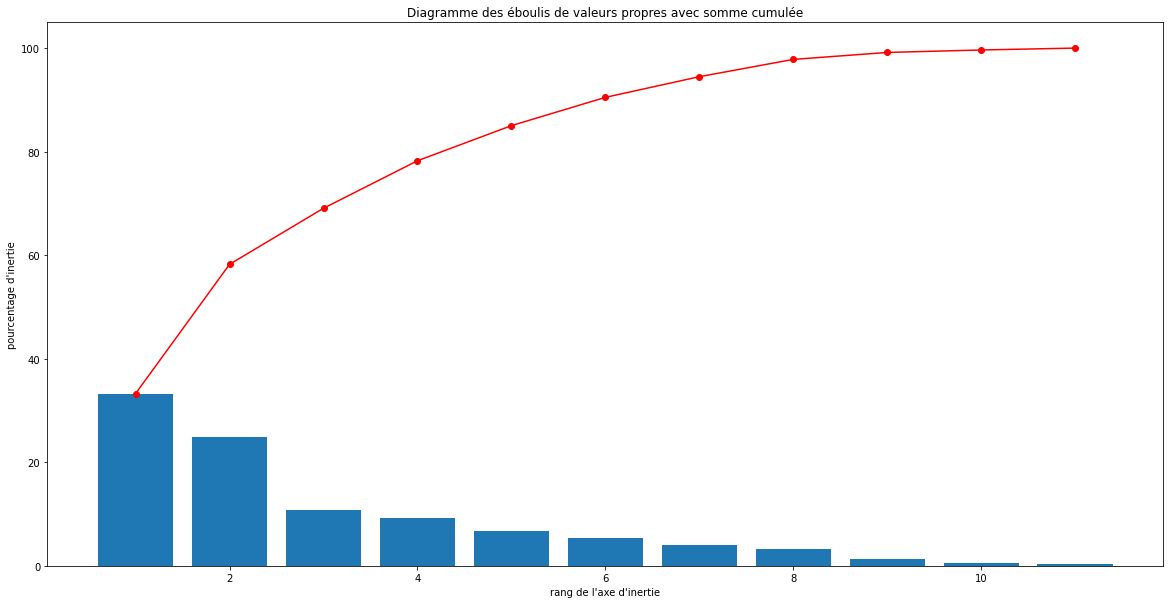

In [93]:
#Représentation de la variance expliquée: Diagramme des éboulis de valeurs propres avec somme cumulée
pca = decomposition.PCA()
X_projected = pca.fit(X_scaled)
scree = pca.explained_variance_ratio_*100

plt.figure(figsize=(20,10))
plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Diagramme des éboulis de valeurs propres avec somme cumulée")

plt.savefig("graph/eboulis_valeurs_propres.png")
plt.show()

#### Le diagramme des éboulis précise une représentation satisfaisante de nos variables sur les deux premières composantes principales, le premier axe factoriel. (58%)



In [94]:
#Pourcentage de variance expliquée par les composantes principales à l'aide de .explained_variance_ratio_
print(pca.explained_variance_ratio_.cumsum())

[0.33270861 0.58237354 0.69058367 0.78234388 0.8501533  0.90480322
 0.94470238 0.97811237 0.99157244 0.99634285 1.        ]


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">3.2- Cercles de corrélation </h3>
</div>

Le but étant de pouvoir simplifier l'ensemble des variables en deux principales variables, afin de pouvoir identifier des similitudes. On parlera alors de corrélation des variables.

In [95]:
#Calcul des composantes principales
#Ici seulement F1 et F2 seront utiles à l'interprétation attendue
X_projected = pca.transform(X_scaled)
df_facto = pd.DataFrame(X_projected, index=df.index, columns=["F" + str(i+1) for i in range(11)]).iloc[:, :2]
df_facto.head() #Affichage des 5 premières lignes

,F1,F2
Zone,,
Afghanistan,-1.64,1.52
Afrique du Sud,1.15,-0.24
Albanie,-0.16,-0.61
Algérie,-1.19,1.14
Allemagne,3.45,-2.55


In [96]:
#Coefficients de la composante principale F1 en fonction des variables
F1 = pca.components_[0]
print(F1) 
#Coefficients de la composante principale F2 en fonction des variables
F2 = pca.components_[1]
print(F2)

[ 0.32731944  0.3142296  -0.22610069  0.30281116  0.242269    0.37780836
  0.24441233  0.13529741  0.01125148  0.44003072  0.42199026]
[-0.41351685 -0.41631963  0.27857772  0.35393264 -0.38553721  0.30076082
 -0.1235649  -0.1565538  -0.02579157  0.28487239  0.30350791]


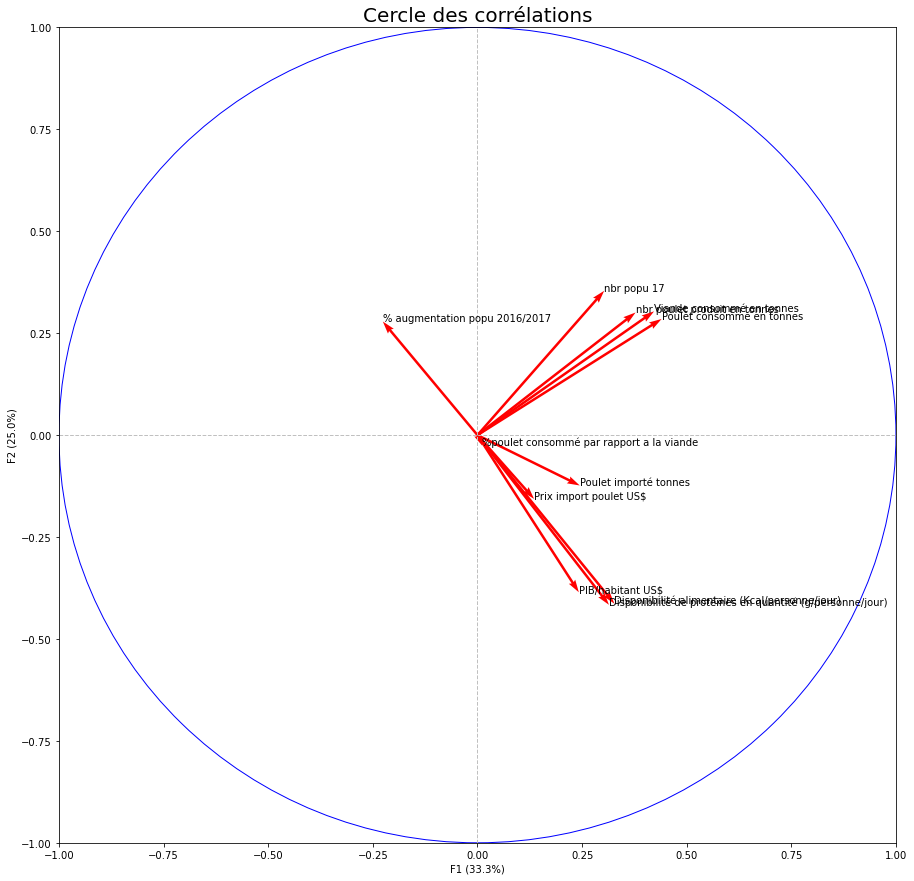

In [97]:
#Cercle des corrélations de nos variables
pcs = pca.components_

fig = plt.subplots(figsize=(15,15))
plt.xlim(-1,1)
plt.ylim(-1,1)

plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
           pcs[0,:], pcs[1,:], 
           angles='xy', scale_units='xy', scale=1, color='r', width= 0.003)

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.text(x, y, df.columns[i])
    
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

#Ajout des axes
plt.plot([-1,1],[0,0],color='silver',linestyle='--',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='--',linewidth=1)

plt.title('Cercle des corrélations', fontsize=20)
plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)))
plt.savefig("graph\\Cercle de corélation.png")

plt.show()

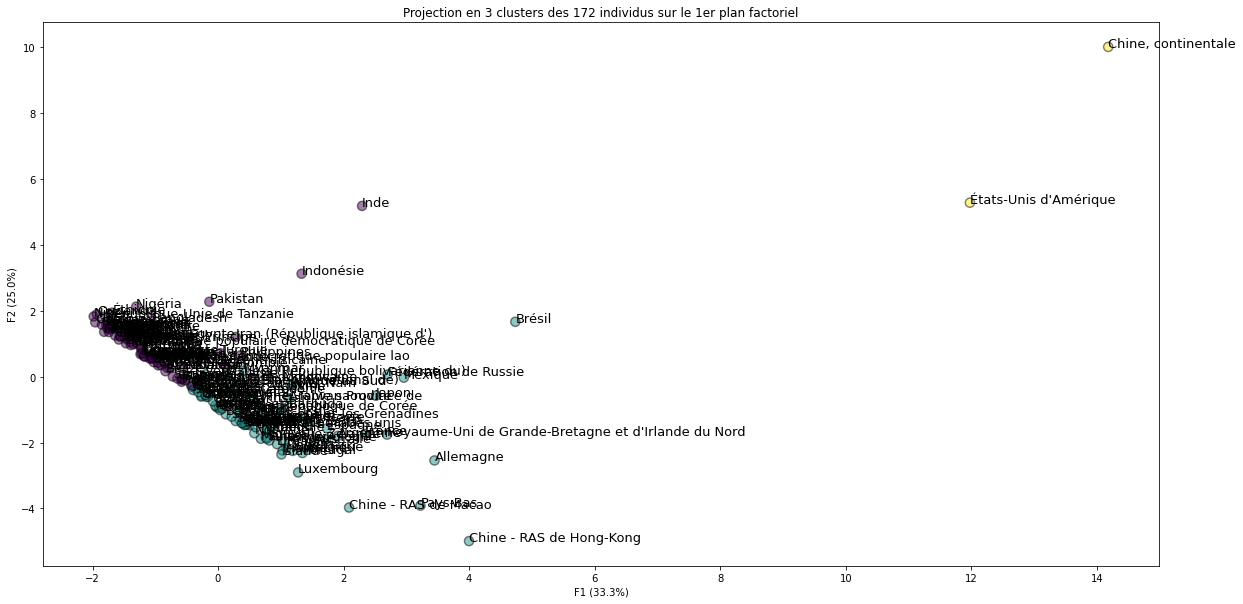

In [98]:
#Coordonnées factorielles 
X_projected = pca.transform(X_scaled)
plt.figure(figsize=(20, 10))


colors = ['red', 'blue']

plt.scatter(X_projected[:, 0], X_projected[:, 1], c=cls3.labels_, 
            alpha=0.5, edgecolors='black', linewidths=1.4, s=85)
for i,(x,y) in enumerate(X_projected[:,[0,1]]):
                    plt.text(x, y, df.index[i], fontsize='13') 



lab_0 = mpatches.Patch(color='yellow', alpha=0.5, label='0')
lab_1 = mpatches.Patch(color='purple', alpha=0.5, label='1')
lab_2 = mpatches.Patch(color='blue', alpha=0.5, label='2')





plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)))
plt.title("Projection en 3 clusters des {} individus sur le 1er plan factoriel".format(X_projected.shape[0]))
plt.savefig("graph\\Projection en 3 clusters des {} individus sur le 1er plan factoriel.png")
plt.show()

  - Production de poulet , poulet consommé et viande consomé sont fortement corrélé positivement a l'axe F1
  - Disponibilité alimentaire, Disponibilité en protéine et PIB par habitant sont fortement corrélé negativement a l'axe F2


Sur la composante F1 la réprésentation des variables représente la consomation et production de poulet.
     
   - Plus un pays ce trouve a droite plus sa consommation et sa production de poulet seront grande

Sur la composante F2 on peut identifier un groupe de variables plus représentatif du régime alimentaire et au PIB.

   - Plus un pays ce trouve en bas plus son PIB, sa disponibilité alimentaire/ proteine seront grande

 <div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">4 - Liste des pays selectionnée
</h2>
</div>

Pour notre objectif nous cherchons donc les pays qui importe le plus, qui ont un pib assez élevé, une consomation de poulet conséquente et une quantité de poulet produit peu conséquente

In [99]:
pays_selectionné = pd.merge(df_cah_1,cluster_1,'inner', 'Zone')

In [100]:
pays_selectionné['Zone'].unique()

array(['Afrique du Sud', 'Albanie', 'Allemagne', 'Arabie saoudite',
       'Argentine', 'Arménie', 'Australie', 'Autriche', 'Belgique',
       'Bulgarie', 'Bélarus', 'Canada', 'Chili',
       'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao',
       'Chine, Taiwan Province de', 'Chypre', 'Croatie', 'Cuba',
       'Danemark', 'Espagne', 'Estonie', 'Finlande', 'France',
       'Fédération de Russie', 'Grèce', 'Hongrie', 'Irlande', 'Islande',
       'Italie', 'Japon', 'Kazakhstan', 'Lettonie', 'Lituanie',
       'Luxembourg', 'Malte', 'Mexique', 'Mongolie', 'Monténégro',
       'Norvège', 'Nouvelle-Zélande', 'Pays-Bas', 'Pologne', 'Portugal',
       'Roumanie', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord",
       'République de Corée', 'Serbie', 'Slovaquie', 'Slovénie', 'Suisse',
       'Suède', 'Tchéquie', 'Turkménistan', 'Uruguay', 'Viet Nam',
       'Émirats arabes unis'], dtype=object)

In [101]:
pays_selectionné.shape

(57, 14)

In [102]:
# Liste des 15 pays les plus aventageux pour l'importation de poulet
pays_selectionné = pays_selectionné.sort_values(by=['Disponibilité alimentaire (Kcal/personne/jour)','PIB/habitant US$','Poulet importé tonnes','%poulet consommé par rapport a la viande'],ascending=False).head(15)
pays_selectionné

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),% augmentation popu 2016/2017,nbr popu 17,PIB/habitant US$,nbr poulet produit en tonnes,Poulet importé tonnes,Prix import poulet US$,%poulet consommé par rapport a la viande,Poulet consommé en tonnes,Viande consommé en tonnes,Groupe,cluster
13,Chine - RAS de Hong-Kong,3.70,4.56,-0.36,-0.23,1.95,-0.22,4.42,-0.23,-0.30,-0.12,-0.09,4,1
14,Chine - RAS de Macao,2.23,2.10,0.28,-0.28,5.16,-0.22,-0.35,-0.00,-0.33,-0.30,-0.24,4,1
4,Argentine,2.16,2.59,-0.25,0.01,0.20,-0.08,-0.43,-0.02,-0.08,0.57,0.40,4,1
26,Hongrie,2.01,0.64,-1.33,-0.22,0.49,-0.18,-0.16,0.69,-0.36,-0.19,-0.14,4,1
43,Portugal,1.84,1.61,-1.44,-0.21,0.66,-0.21,-0.04,0.18,-0.38,-0.16,-0.11,4,1
37,Mongolie,1.84,1.80,0.54,-0.26,-0.39,-0.22,-0.42,-0.24,-1.72,-0.30,-0.20,4,1
7,Autriche,1.80,1.10,-0.39,-0.22,1.68,-0.20,0.12,0.36,-0.88,-0.23,-0.14,4,1
28,Islande,1.70,1.46,-0.54,-0.28,1.75,-0.22,-0.47,-0.24,-0.26,-0.30,-0.24,4,1
34,Luxembourg,1.62,1.13,0.81,-0.28,4.62,-0.22,-0.42,-0.23,-0.77,-0.30,-0.24,4,1
22,Finlande,1.58,0.79,-0.90,-0.24,1.36,-0.21,-0.39,-0.22,-0.69,-0.26,-0.19,4,1
